# Womxn in Big Data South Africa: Female-Headed Households in South Africa

* Estimate the % of households per ward that are female-headed and living below an income threshold
* Examine how resources are unevenly distributed in SA

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Load data

In [2]:
df = pd.read_csv('../Train.csv', index_col='ward')

In [3]:
desc = pd.read_csv('../variable_descriptions.csv')
pd.set_option('display.max_colwidth', 200)
desc.loc[:,['Column', 'Description']]

,Column,Description
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats
3,dw_03,Percentage of dwellings of type: Cluster house in complex
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex)
5,dw_05,Percentage of dwellings of type: Semi-detached house
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat


In [4]:
df.shape

(2822, 62)

Looking at the Test file

In [5]:
df2 = pd.read_csv('../Test.csv', index_col='ward')
df2.shape


(1013, 61)

In [6]:
df2.columns

Index(['total_households', 'total_individuals', 'dw_00', 'dw_01', 'dw_02',
       'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10',
       'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_02', 'psa_03',
       'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01',
       'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06',
       'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_13',
       'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00',
       'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06', 'pw_07',
       'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

We won't be using this file (Test) because it doesn't have the target variable; therefore, we can't validate the model's performance

## Exploratory data analysis

In [7]:
df.head()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
ward,,,,,,,,,,,,,,,,,,,,,
41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


<AxesSubplot:xlabel='target', ylabel='Density'>

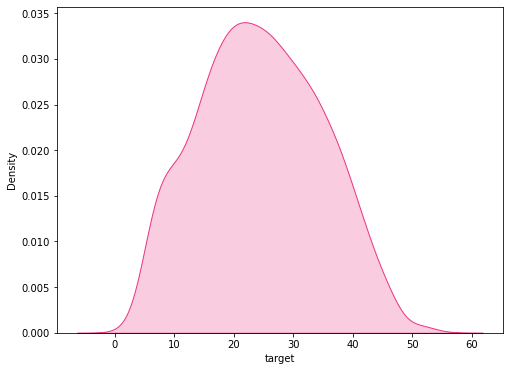

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(df.target, color='#eb3483', shade=True, ax=ax)

In [9]:
df.target.min()

0.0

In [10]:
df.target.max()

55.52842273939999

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 41601001: Ward 1 to 34503005: Ward 5
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_households   2822 non-null   float64
 1   total_individuals  2822 non-null   float64
 2   target             2822 non-null   float64
 3   dw_00              2822 non-null   float64
 4   dw_01              2822 non-null   float64
 5   dw_02              2822 non-null   float64
 6   dw_03              2822 non-null   float64
 7   dw_04              2822 non-null   float64
 8   dw_05              2822 non-null   float64
 9   dw_06              2822 non-null   float64
 10  dw_07              2822 non-null   float64
 11  dw_08              2822 non-null   float64
 12  dw_09              2822 non-null   float64
 13  dw_10              2822 non-null   float64
 14  dw_11              2822 non-null   float64
 15  dw_12              2822 non-null   int64  
 16  dw

Looks like there's no missing data. Next, we'll delete all columns that describe "Unspecified" values

In [12]:
unspecified_val_cols = [
             'dw_12', 'dw_13',              # dwelling type
             'psa_02', 'psa_03','psa_04',   # school attendance
             'lan_13', 'lan_14',            # language
             'pw_07', 'pw_08',              # piped water
             'ADM4_PCODE'                   # code
            ]
df = df.drop(unspecified_val_cols, axis=1)

Since we have few columns with "Yes" and "No" features, we'll drop the "No" ones

In [13]:
no_cols = ['psa_01','stv_01', 'car_01', 'lln_01']
df = df.drop(no_cols, axis=1)

In [14]:
df.columns

Index(['total_households', 'total_individuals', 'target', 'dw_00', 'dw_01',
       'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09',
       'dw_10', 'dw_11', 'psa_00', 'stv_00', 'car_00', 'lln_00', 'lan_00',
       'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07',
       'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'pg_00', 'pg_01',
       'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03',
       'pw_04', 'pw_05', 'pw_06', 'lat', 'lon', 'NL'],
      dtype='object')

### Group variables

We are going to aggregate variables in larger, more generic groups

In [15]:
df['house_informal'] = df.dw_07 + df.dw_08                                   # informal dwelling
df['lang_euro'] = df.lan_00 + df.lan_01                                        # euro languages
df['water_community'] = df.pw_02 + df.pw_03 + df.pw_04 + df.pw_05 + df.pw_06   # water in community
df['person_household'] = df.total_individuals / df.total_households            # person per household

In [16]:
used_cols = ['dw_07', 'dw_08', 'lan_00', 'lan_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06', 'total_individuals', 'total_households']
df = df.drop(used_cols, axis=1)

In [17]:
df.columns

Index(['target', 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06',
       'dw_09', 'dw_10', 'dw_11', 'psa_00', 'stv_00', 'car_00', 'lln_00',
       'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08',
       'lan_09', 'lan_10', 'lan_11', 'lan_12', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'lat', 'lon', 'NL',
       'house_informal', 'lang_euro', 'water_community', 'person_household'],
      dtype='object')

In [18]:
households = df[['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_09', 'dw_10', 'dw_11']]
languages = df[['lang_euro', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 
                'lan_10', 'lan_11', 'lan_12']]
water = df[['water_community', 'pw_00', 'pw_01']]
ethnicity = df[['pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04']]

### Check correlation between variables from each group

<AxesSubplot:>

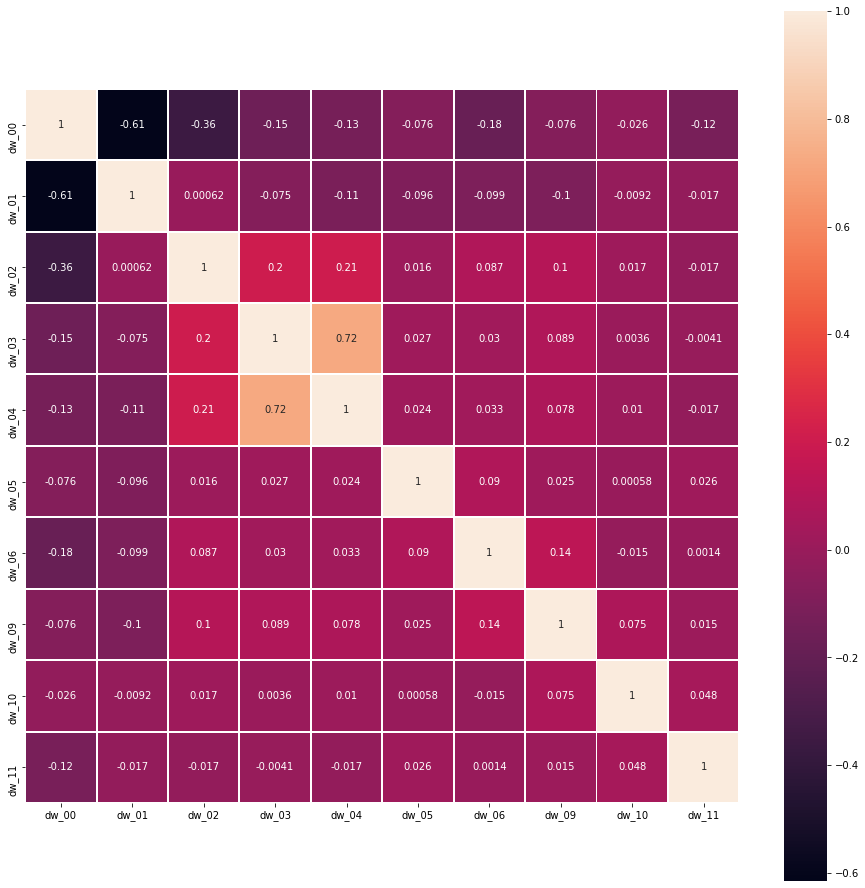

In [19]:
households_corr = households.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(households_corr, linewidths = 1, square= True, annot = True, ax=ax)

As we can observe in the correlation graph, these values have strong correlation:
* dw_00 and dw_01
* dw_00 and dw_02
* dw_03 and dw_04

So we are going to drop the second feature as they describe almost the same thing as the first one

In [20]:
strong_corr_cols = ['dw_01', 'dw_02', 'dw_04']
df = df.drop(strong_corr_cols, axis=1)

<AxesSubplot:>

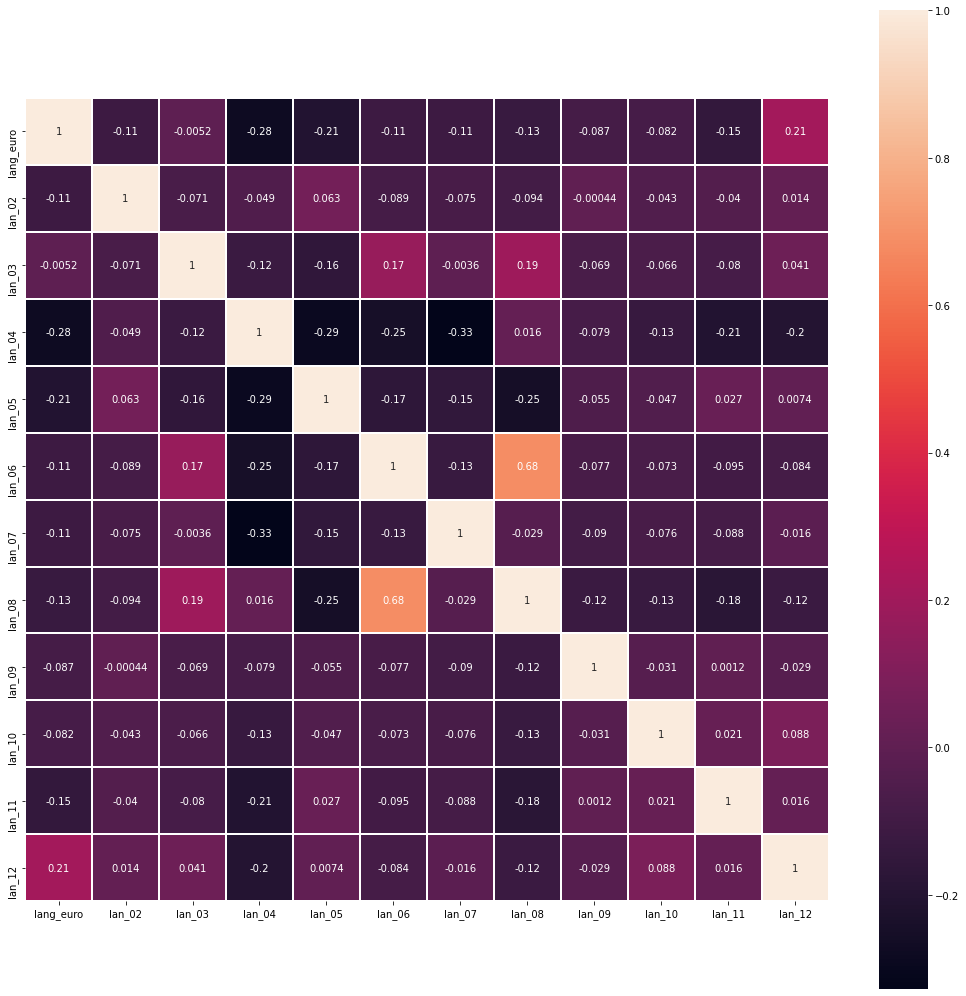

In [21]:
languages_corr = languages.corr()
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(languages_corr, linewidths = 1, square= True, annot = True, ax=ax)

There are many strong correlations in this type of feature. However, in theory this languages are different from each other (they don't necessarily share the same information); that's why they'll remain the same 

<AxesSubplot:>

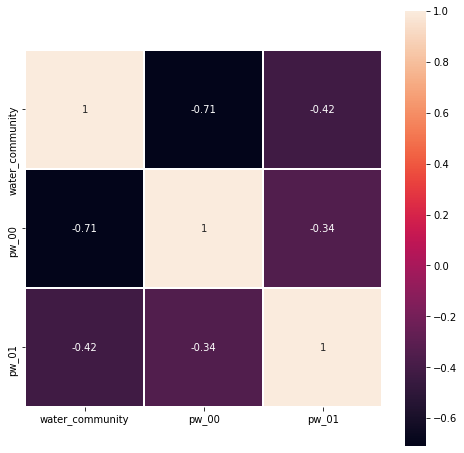

In [22]:
water_corr = water.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(water_corr, linewidths = 1, square= True, annot = True, ax=ax)

Same as above, this features are different from each other and they'll remain the same 

<AxesSubplot:>

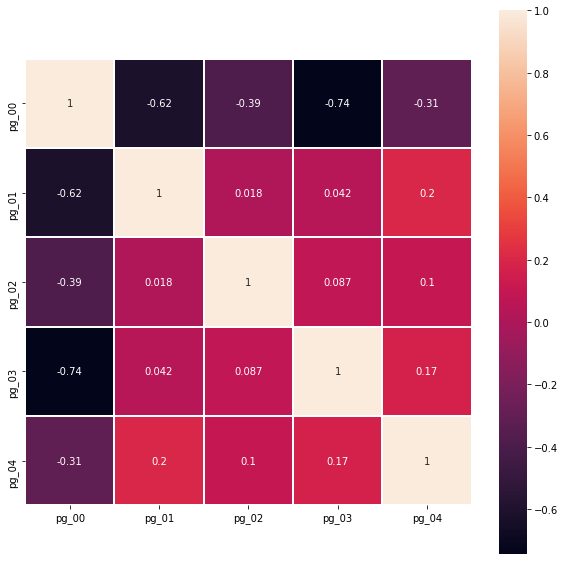

In [23]:
ethnicity_corr = ethnicity.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ethnicity_corr, linewidths = 1, square= True, annot = True, ax=ax)

Same as above, this features are different from each other and they'll remain the same 

The remaining features are:

In [24]:
df.columns

Index(['target', 'dw_00', 'dw_03', 'dw_05', 'dw_06', 'dw_09', 'dw_10', 'dw_11',
       'psa_00', 'stv_00', 'car_00', 'lln_00', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00',
       'pw_00', 'pw_01', 'lat', 'lon', 'NL', 'house_informal', 'lang_euro',
       'water_community', 'person_household'],
      dtype='object')

### Rename features

In [25]:
df.rename(columns={
    'dw_00': 'house_block_structure', 'dw_03': 'house_in_complex', 'dw_05': 'house_semi',
    'dw_06': 'house_backyard', 'dw_09': 'house_room_flat', 'dw_10': 'house_caravan_tent', 'dw_11': 'house_other',
    'psa_00': 'school_attendance', 'stv_00': 'satellite_tv', 'car_00': 'has_car', 'lln_00': 'landline_ownership',
    'lan_02': 'lang_isiNdebele', 'lan_03': 'lang_isiXhosa', 'lan_04': 'lang_isiZulu', 'lan_05': 'lang_sepedi',
    'lan_06': 'lang_sesotho', 'lan_07': 'lang_setswana', 'lan_08': 'lang_sign', 'lan_09': 'lang_siSwati',
    'lan_10': 'lang_tshivenda', 'lan_11': 'lang_xitsonga', 'lan_12': 'lang_other',
    'pg_00': 'race_black', 'pg_01': 'race_coloured', 'pg_02': 'race_indian_asian',
    'pg_03': 'race_white', 'pg_04': 'race_other',
    'lgt_00': 'electricity',
    'pw_00': 'water_dwelling_institution', 'pw_01': 'water_yard'
}, inplace=True)
df.columns

Index(['target', 'house_block_structure', 'house_in_complex', 'house_semi',
       'house_backyard', 'house_room_flat', 'house_caravan_tent',
       'house_other', 'school_attendance', 'satellite_tv', 'has_car',
       'landline_ownership', 'lang_isiNdebele', 'lang_isiXhosa',
       'lang_isiZulu', 'lang_sepedi', 'lang_sesotho', 'lang_setswana',
       'lang_sign', 'lang_siSwati', 'lang_tshivenda', 'lang_xitsonga',
       'lang_other', 'race_black', 'race_coloured', 'race_indian_asian',
       'race_white', 'race_other', 'electricity', 'water_dwelling_institution',
       'water_yard', 'lat', 'lon', 'NL', 'house_informal', 'lang_euro',
       'water_community', 'person_household'],
      dtype='object')

In [26]:
df.head()

,target,house_block_structure,house_in_complex,house_semi,house_backyard,house_room_flat,house_caravan_tent,house_other,school_attendance,satellite_tv,...,electricity,water_dwelling_institution,water_yard,lat,lon,NL,house_informal,lang_euro,water_community,person_household
ward,,,,,,,,,,,,,,,,,,,,,
41601001: Ward 1,16.773757,0.933841,0.000676,0.001372,0.005750,0.002823,0.001431,0.008224,0.260191,0.283468,...,0.919424,0.742692,0.214027,-29.682270,24.734743,0.292039,0.039546,0.845249,0.043281,3.516501
41601002: Ward 2,21.496661,0.696940,0.000000,0.001323,0.007575,0.001486,0.001253,0.008010,0.290228,0.103641,...,0.959259,0.309294,0.576844,-29.119311,24.757737,3.207775,0.275457,0.888100,0.113862,3.877587
41601003: Ward 3,10.931425,0.810545,0.003986,0.000956,0.006686,0.000000,0.000000,0.004150,0.186435,0.165772,...,0.826164,0.323393,0.483376,-29.142276,25.094093,0.000000,0.152534,0.581537,0.193231,3.025929
41601004: Ward 4,23.119257,0.659914,0.000000,0.037245,0.005255,0.000000,0.000000,0.002947,0.281229,0.087768,...,0.986151,0.677437,0.314194,-29.372052,24.942867,2.038778,0.287695,0.750342,0.008369,3.294194
41601005: Ward 5,13.652252,0.950575,0.000598,0.000818,0.004985,0.008693,0.000000,0.000673,0.196687,0.345975,...,0.957376,0.771106,0.194743,-29.409381,25.290165,0.000000,0.024532,0.436975,0.034150,3.846971


Strongest correlation with the target

In [27]:
df.corr()['target'].sort_values(ascending=False).head(20)

target                   1.000000
school_attendance        0.782472
water_community          0.643754
race_black               0.613346
lon                      0.347088
lang_sepedi              0.275263
lang_isiZulu             0.232266
lang_xitsonga            0.210597
lat                      0.120381
water_yard               0.113646
lang_tshivenda           0.106548
lang_siSwati             0.066230
house_block_structure    0.018461
lang_sign               -0.003930
lang_isiNdebele         -0.020163
lang_sesotho            -0.038563
person_household        -0.039266
lang_setswana           -0.046968
house_other             -0.109490
house_caravan_tent      -0.128540
Name: target, dtype: float64

Weakest correlation with the target

In [28]:
df.corr()['target'].sort_values(ascending=True).head(20)

water_dwelling_institution   -0.754536
has_car                      -0.702831
satellite_tv                 -0.664181
landline_ownership           -0.637835
lang_euro                    -0.626055
race_white                   -0.583908
NL                           -0.514398
house_in_complex             -0.338137
lang_other                   -0.325367
electricity                  -0.260286
house_backyard               -0.248573
house_room_flat              -0.235331
race_coloured                -0.232792
race_indian_asian            -0.224005
house_informal               -0.216142
race_other                   -0.213812
house_semi                   -0.146357
lang_isiXhosa                -0.142685
house_caravan_tent           -0.128540
house_other                  -0.109490
Name: target, dtype: float64

Mean of each feature

In [29]:
df.describe()

,target,house_block_structure,house_in_complex,house_semi,house_backyard,house_room_flat,house_caravan_tent,house_other,school_attendance,satellite_tv,...,electricity,water_dwelling_institution,water_yard,lat,lon,NL,house_informal,lang_euro,water_community,person_household
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,...,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000
mean,24.507554,0.712196,0.006057,0.006289,0.022375,0.006864,0.001112,0.007902,0.311268,0.225922,...,0.836432,0.359691,0.329684,-26.880740,28.666515,17.437560,0.103881,0.156287,0.310625,5.163249
std,10.294387,0.214035,0.019374,0.024606,0.037127,0.016819,0.003041,0.024762,0.076627,0.173811,...,0.203143,0.304472,0.236642,2.021279,2.373809,18.958621,0.142418,0.252162,0.315092,72.727066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001692,0.000000,0.000000,-32.490089,16.760022,0.000000,0.000000,0.000000,0.000000,1.254742
25%,16.751556,0.594212,0.000000,0.000000,0.002716,0.000233,0.000000,0.001991,0.255573,0.098199,...,0.796471,0.087638,0.111282,-28.569019,27.707932,3.033397,0.009481,0.014302,0.029879,3.246975
50%,24.156670,0.766841,0.000807,0.000865,0.008639,0.001755,0.000391,0.004092,0.301668,0.172787,...,0.914060,0.277999,0.302130,-26.549866,28.959679,9.205572,0.043246,0.029801,0.190004,3.706505
75%,32.226553,0.881708,0.002538,0.003027,0.025218,0.006507,0.001043,0.007803,0.371197,0.303378,...,0.964334,0.582946,0.508771,-25.572130,30.441505,26.890531,0.140432,0.154557,0.540985,4.197986
max,55.528423,0.994962,0.264239,0.435912,0.412936,0.282843,0.068752,1.000000,0.561597,0.840486,...,1.000000,0.995907,0.937595,-22.331267,32.858249,63.000000,0.982041,0.984082,1.000000,3867.000000


There is an outlier in person_household feature

In [30]:
index = np.where(df==df.person_household.max())
df.iloc[index]

,person_household
ward,
93601011: Ward 11,3867.0


In [31]:
df = df[df.person_household<df.person_household.max()]

In [32]:
df.describe()

,target,house_block_structure,house_in_complex,house_semi,house_backyard,house_room_flat,house_caravan_tent,house_other,school_attendance,satellite_tv,...,electricity,water_dwelling_institution,water_yard,lat,lon,NL,house_informal,lang_euro,water_community,person_household
count,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,...,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000
mean,24.516242,0.712449,0.006059,0.006291,0.022382,0.006867,0.001112,0.007550,0.311378,0.226002,...,0.836374,0.359819,0.329800,-26.881459,28.666982,17.439836,0.103918,0.156343,0.310381,3.794289
std,10.285861,0.213652,0.019377,0.024610,0.037131,0.016822,0.003041,0.016256,0.076416,0.173790,...,0.203155,0.304451,0.236603,2.021277,2.374100,18.961597,0.142430,0.252190,0.314880,0.807088
min,1.671886,0.005552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045440,0.004186,...,0.001692,0.001853,0.001072,-32.490089,16.760022,0.000000,0.000000,0.001427,0.000000,1.254742
25%,16.758903,0.594243,0.000000,0.000000,0.002717,0.000235,0.000000,0.001988,0.255643,0.098214,...,0.796326,0.088138,0.111336,-28.569253,27.714079,3.032927,0.009507,0.014306,0.029878,3.246857
50%,24.157369,0.766850,0.000807,0.000866,0.008640,0.001755,0.000391,0.004090,0.301714,0.172868,...,0.914039,0.278001,0.302232,-26.550224,28.961605,9.199870,0.043391,0.029840,0.189563,3.706475
75%,32.227600,0.881882,0.002539,0.003031,0.025236,0.006507,0.001043,0.007797,0.371199,0.303417,...,0.964333,0.583050,0.508989,-25.572723,30.441969,26.911829,0.140462,0.154642,0.540303,4.197635
max,55.528423,0.994962,0.264239,0.435912,0.412936,0.282843,0.068752,0.576520,0.561597,0.840486,...,0.999342,0.995907,0.937595,-22.331267,32.858249,63.000000,0.982041,0.984082,0.992047,8.660609


array([[<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'house_block_structure'}>,
        <AxesSubplot:title={'center':'house_in_complex'}>,
        <AxesSubplot:title={'center':'house_semi'}>,
        <AxesSubplot:title={'center':'house_backyard'}>,
        <AxesSubplot:title={'center':'house_room_flat'}>],
       [<AxesSubplot:title={'center':'house_caravan_tent'}>,
        <AxesSubplot:title={'center':'house_other'}>,
        <AxesSubplot:title={'center':'school_attendance'}>,
        <AxesSubplot:title={'center':'satellite_tv'}>,
        <AxesSubplot:title={'center':'has_car'}>,
        <AxesSubplot:title={'center':'landline_ownership'}>],
       [<AxesSubplot:title={'center':'lang_isiNdebele'}>,
        <AxesSubplot:title={'center':'lang_isiXhosa'}>,
        <AxesSubplot:title={'center':'lang_isiZulu'}>,
        <AxesSubplot:title={'center':'lang_sepedi'}>,
        <AxesSubplot:title={'center':'lang_sesotho'}>,
        <AxesSubplot:title={'center':'l

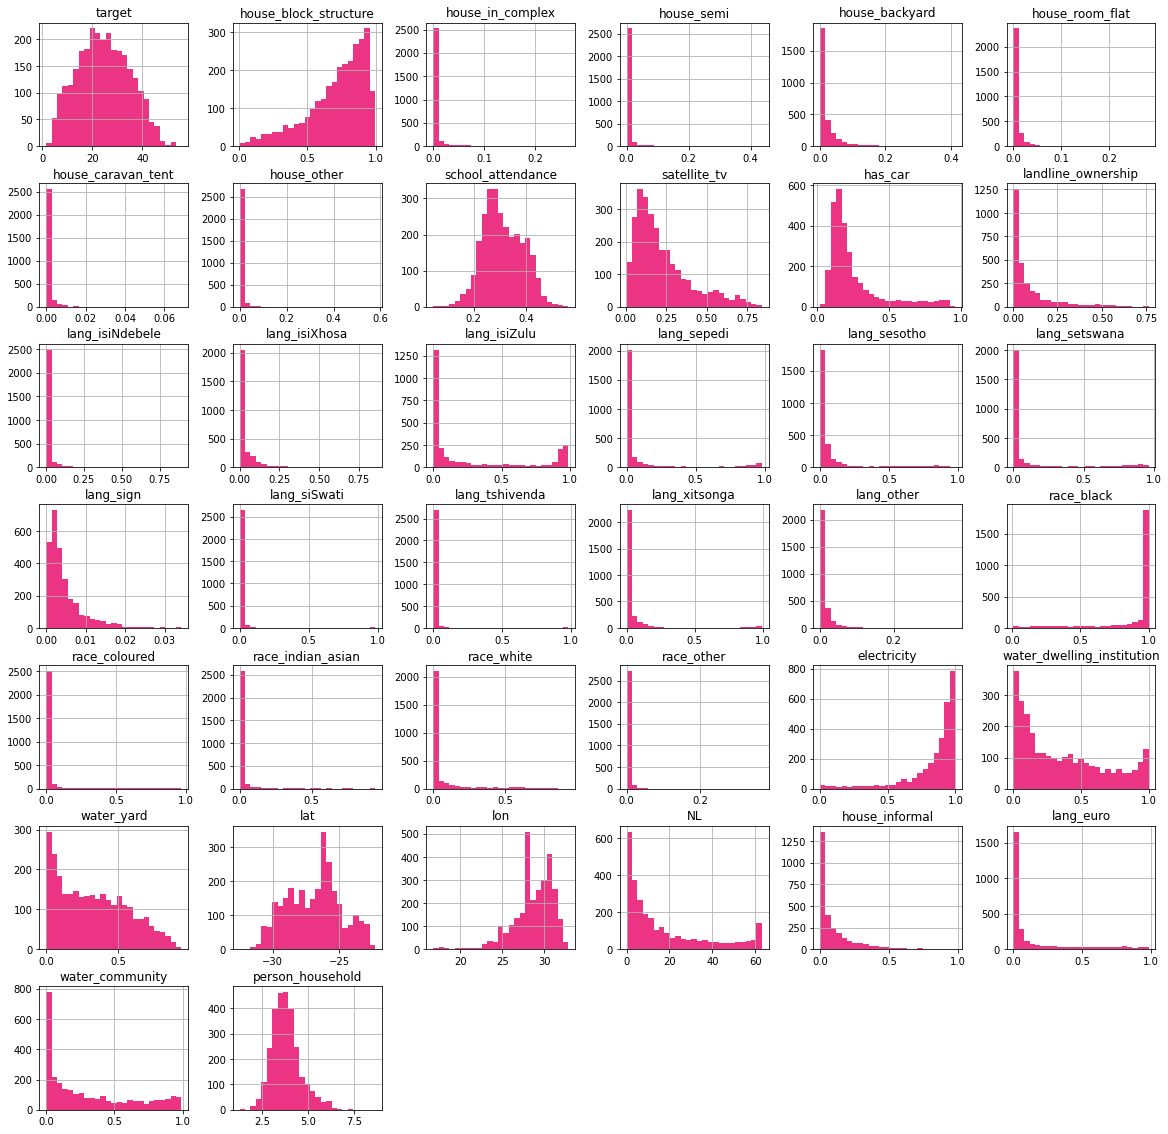

In [33]:
df.hist(bins=25, figsize=(20, 20), color='#eb3483')

The remaining features have a good level of correlation, so they're going to be included in the analysis

In [34]:
df.to_pickle('Data.pkl')